In [53]:
import numpy as np
import pandas as pd 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import PunktSentenceTokenizer , TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score


In [54]:
df_all = pd.read_pickle('data/all_data.pkl')
#Do this once, only when your data is changed 
# df_train = df_all.sample(frac=0.7)
# df_test = df_all.loc[~df_all.index.isin(df_train.index), :]
#pickle these for grid search
# df_train.to_pickle('data/data_train.pkl')
# df_test.to_pickle('data/data_test.pkl')

In [55]:
df_all.head(2)

,content,id,label,media-type,published,source,title
0,(Before It's News) \n\nHow did Trump do in th...,804e6b92-04aa-494d-a261-b93d5d1357ad,1,News,2015-09-17T20:59:20Z,Before Its News,How Did Trump Do in the Debate?
1,(Before It's News) \n \nKaren Rueda | Cathol...,d0ec4c73-c790-4f12-8641-7df64c9c5f24,1,News,2015-09-28T16:30:14Z,Before It's News,"Panelists say fewer births, marriages point to..."


In [56]:
len(df_all)

12492

In [82]:
df_train = pd.read_pickle('data/data_train.pkl')
df_test = pd.read_pickle('data/data_test.pkl')

In [58]:
df_train.groupby('label').count()

,content,id,media-type,published,source,title
label,,,,,,
0,6445,6445,6445,6445,6445,6445
1,2299,2299,2299,2299,2299,2299


In [59]:
df_test.groupby('label').count()

,content,id,media-type,published,source,title
label,,,,,,
0,2835,2835,2835,2835,2835,2835
1,913,913,913,913,913,913


In [83]:
#change above X if we r using tokenize and other nlp process
X_train = df_train['content']
y_train = df_train['label']
X_test = df_test['content']
y_test = df_test['label']

In [ ]:
# stop = set(stopwords.words('english'))
# snowball = SnowballStemmer('english')
# treebank_word_tokenize = TreebankWordTokenizer().tokenize

# def customer_tokenize(col):
#     tokens = [treebank_word_tokenize(content.lower())for content in col]
#     tokens2 = [[word for word in words if word not in stop] for words in tokens]
#     snowballs = [[snowball.stem(word) for word in words]
#                  for words in tokens2]
#     bag_of_words = []
#     for lst in snowballs:
#         for word in lst:
#             bag_of_words.append(word)
#     return bag_of_words

# tfidfvect = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
# tfidf_vectorized = tfidfvect.fit_transform(new_train['trigger'])

In [84]:
tfidf_vectorizer  = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1,2), max_df= 0.85, min_df= 2)

In [85]:
#takes around 2-3 mins
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Create Confusion Matrix

In [90]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


def plot_confusion_matrix(y_pred, y_true):
    '''Code stolen brazenly from sklearn example.'''
    cm = confusion_matrix(y_true, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Fake', 'Real']); ax.yaxis.set_ticklabels(['Fake', 'Real']);


## Modeling

### Naive Bayes

In [63]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb = nb.fit(X_train_tfidf, y_train)
y_test_predict_nb = nb.predict(X_test_tfidf)

In [64]:
nb_acc = accuracy_score(y_test, y_test_predict_nb) *  100 
nb_F1 = f1_score(y_test, y_test_predict_nb) * 100
nb_precision = precision_score(y_test, y_test_predict_nb) * 100
nb_recall = recall_score(y_test, y_test_predict_nb) * 100
print ("Naive Bayes accuracy and F1 score \n")
print ("Accuracy {:.5}".format(nb_acc))
print ("F1 {:.5}".format(nb_F1))
print ("Precision {:.5}".format(nb_precision))
print ("Recall {:.5}".format(nb_recall))

Naive Bayes accuracy and F1 score 

Accuracy 76.73
F1 18.437
Precision 100.0
Recall 10.155


### Logistic Regression

In [86]:
# using optimal parameters from grid search (l1 and 10)
lr = LogisticRegression(penalty='l1', C = 10)
# train our model
lr.fit(X_train_tfidf, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
y_test_predict_lr = lr.predict(X_test_tfidf)

In [88]:
lr_acc = accuracy_score(y_test, y_test_predict_lr) *  100 
lr_F1 = f1_score(y_test, y_test_predict_lr) * 100
lr_precision = precision_score(y_test, y_test_predict_lr) * 100
lr_recall = recall_score(y_test, y_test_predict_lr) * 100
print ("Logistic regression accuracy and F1 score \n")
print ("Accuracy {:.5}".format(lr_acc))
print ("F1 {:.5}".format(lr_F1))
print ("Precision {:.5}".format(lr_precision))
print ("Recall {:.5}".format(lr_recall))

Logistic regression accuracy and F1 score 

Accuracy 94.637
F1 88.864
Precision 89.91
Recall 87.842


In [95]:
from pandas_ml import ConfusionMatrix

/Users/ashish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [99]:
coeff = lr.coef_[0]

In [101]:
coeff.shape

(306896,)

In [114]:
type(X_train_tfidf)

scipy.sparse.csr.csr_matrix

In [116]:
X_train_tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
top_n_index = np.argsort(coeff)[::-1][:20]

In [126]:
top_n_index

array([187635,  60916,  34310,  96735, 266485, 187839, 211366,  30411,
       211379, 107032,  28111, 217865,  15898,  71355,  73609, 276806,
       211449, 106793, 215920, 189587])

In [119]:
feature_names = tfidf_vectorizer.get_feature_names()

In [124]:
top_feat_tuple = [(feature_names[i], coeff[i]) for i in top_n_index]

In [125]:
top_feat_tuple

[('news', 98.52157465550368),
 ('com contacts', 51.929872690282004),
 ('average rating', 42.86070155944254),
 ('embedded content', 40.25144631864945),
 ('story proactiveinvestors', 33.36318503483563),
 ('news immediate', 30.00000467735541),
 ('post', 28.613609931107735),
 ('article', 28.20279572531542),
 ('post appeared', 27.180963927045187),
 ('fact', 26.794956751738148),
 ('appeared', 21.91260461953178),
 ('profits', 21.220727202693364),
 ('___', 20.691664242296223),
 ('copyright', 20.54380645834675),
 ('course', 19.552703792783046),
 ('thanks', 18.84813448815011),
 ('post originally', 18.829608253507253),
 ('facebookshare twitter', 18.568213872752715),
 ('proactiveinvestors', 18.30234639190664),
 ('noted', 18.10447489098206)]

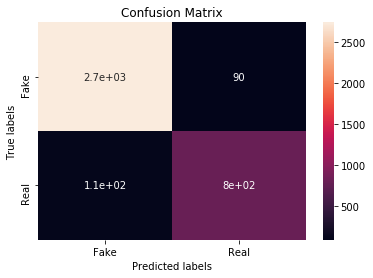

In [104]:
plot_confusion_matrix(y_test_predict_lr, y_test)


### Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
# Take almost one min
rf = RandomForestClassifier(n_estimators=50,min_samples_split=5, max_depth=60)
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=60, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [130]:
y_test_predict_rf = rf.predict(X_test_tfidf)

In [131]:
rf_acc = accuracy_score(y_test, y_test_predict_rf) *  100 
rf_F1 = f1_score(y_test, y_test_predict_rf) * 100
rf_precision = precision_score(y_test, y_test_predict_rf) * 100
rf_recall = recall_score(y_test, y_test_predict_rf) * 100
print ("Random Forest accuracy and F1 score \n")
print ("Accuracy {:.5}".format(rf_acc))
print ("F1 {:.5}".format(rf_F1))
print ("Precision {:.5}".format(rf_precision))
print ("Recall {:.5}".format(rf_recall))

Random Forest accuracy and F1 score 

Accuracy 88.821
F1 71.36
Precision 94.909
Recall 57.174


In [111]:
rf_features = rf.feature_importances_

In [112]:
rf_features

array([5.48194064e-05, 0.00000000e+00, 0.00000000e+00, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [ ]:
plot_confusion_matrix(y_test_predict_rf, y_test)

### SVM classifier

In [77]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', probability = True, random_state = 0)

In [78]:
#6.49 -> 7.38
svm.fit(X_train_tfidf, y_train)
y_test_predict_svm = svm.predict(X_test_tfidf)

In [79]:
svm_acc = accuracy_score(y_test, y_test_predict_svm) *  100 
svm_F1 = f1_score(y_test, y_test_predict_svm) * 100
svm_precision = precision_score(y_test, y_test_predict_svm) * 100
svm_recall = recall_score(y_test, y_test_predict_svm) * 100
print ("SVM accuracy and F1 score \n")
print ("Accuracy {:.5}".format(svm_acc))
print ("F1 {:.5}".format(svm_F1))
print ("Precision {:.5}".format(svm_precision))
print ("Recall {:.5}".format(svm_recall))

SVM accuracy and F1 score 

Accuracy 93.825
F1 87.324
Precision 93.233
Recall 82.119


In [ ]:
plot_confusion_matrix(y_test_predict_svm, y_test)

### Boosting using Adaboost

In [132]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [133]:
ada = AdaBoostClassifier(algorithm = "SAMME.R", n_estimators = 100)

In [134]:
# takes some time
ada.fit(X_train_tfidf, y_train)
y_test_predict_ada = ada.predict(X_test_tfidf)

In [135]:
ada_acc = accuracy_score(y_test, y_test_predict_ada) *  100 
ada_F1 = f1_score(y_test, y_test_predict_ada) * 100
ada_precision = precision_score(y_test, y_test_predict_ada) * 100
ada_recall = recall_score(y_test, y_test_predict_ada) * 100
print ("AdaBoost accuracy and F1 score \n")
print ("Accuracy {:.5}".format(ada_acc))
print ("F1 {:.5}".format(ada_F1))
print ("Precision {:.5}".format(ada_precision))
print ("Recall {:.5}".format(ada_recall))

AdaBoost accuracy and F1 score 

Accuracy 93.89
F1 87.493
Precision 87.255
Recall 87.733


In [ ]:
plot_confusion_matrix(y_test_predict_ada, y_test)

### Lets plot ROC curve for various models

Import necessary library for ploting


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as skm
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline

In [ ]:
# First calculate predicted probabilities for all the models
nb_probs = nb.predict_proba(X_test_tfidf)[:, 1]
lr_probs = lr.predict_proba(X_test_tfidf)[:, 1]
rf_probs = rf.predict_proba(X_test_tfidf)[:, 1]
ada_probs = ada.predict_proba(X_test_tfidf)[:, 1]
svm_probs = svm.predict_proba(X_test_tfidf)[:, 1]

#fpr, tpr, threshold = roc_curve(y_test, preds)
fpr_nb, tpr_nb, thresholds_nb = skm.roc_curve(y_test, nb_probs)
fpr_lr, tpr_lr, thresholds_lr = skm.roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, thresholds_rf = skm.roc_curve(y_test, rf_probs)
fpr_ada, tpr_ada, thresholds_ada = skm.roc_curve(y_test, ada_probs)
fpr_svm, tpr_svm, thresholds_svm = skm.roc_curve(y_test, svm_probs)


roc_auc_nb = skm.auc(fpr_nb, tpr_nb)
roc_auc_lr = skm.auc(fpr_lr, tpr_lr)
roc_auc_rf = skm.auc(fpr_rf, tpr_rf)
roc_auc_ada = skm.auc(fpr_ada, tpr_ada)
roc_auc_svm = skm.auc(fpr_svm, tpr_svm)

In [ ]:
roc_auc_nb, roc_auc_lr, roc_auc_rf, roc_auc_ada, roc_auc_svm

In [ ]:
#Now plot these values
plt.title('ROC (Receiver Operating Characteristic)')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'NaiveBayes :AUC = %0.2f' % roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, 'g', label = 'LogReg :AUC = %0.2f' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, 'r', label = 'RandForest :AUC = %0.2f' % roc_auc_rf)
plt.plot(fpr_ada, tpr_ada, 'r', label = 'AdaBoost :AUC = %0.2f' % roc_auc_ada)
plt.plot(fpr_svm, tpr_svm, 'r', label = 'SVM :AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.show()

In [ ]:
import sklearn.metrics as skm
skm.roc_auc_score(y_test, y_test_predict_nb),  skm.roc_auc_score(y_test, y_test_predict_lr), skm.roc_auc_score(y_test, y_test_predict_rf)

#### To see only one ROC curve,

Explore why ROC is not giving us correct curve. I can clearly see I am getting bad performance in case of Naive Bayes and its roc_auc_score when calculated is also 0.72. But when using roc_curve from sklearn.metrics somehow the fpr and tpr are not coming correctly??? Below is just a 

In [ ]:
nb_probs = nb.predict_proba(X_test_tfidf)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_probs)
roc_auc_nb = skm.auc(fpr_nb, tpr_nb)
plt.title('ROC (Receiver Operating Characteristic)')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'NaiveBayes: AUC = %0.2f' % roc_auc_nb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.show()

